# Imports

In [1]:
! pip install torch

In [2]:
! pip install ultralytics

In [3]:
import torch
print("GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))


GPU Available: False


In [4]:
! pip install supervision

In [6]:
import torch
import torchvision.models as models
from PIL import Image
from torchvision import transforms
from torchvision import models # type: ignore
import matplotlib.pyplot as plt
from ultralytics import YOLO
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import random


In [6]:
# import zipfile

# # Path to the archive in Colab
# archive_path = '/content/car.zip'

# # Extract files
# with zipfile.ZipFile(archive_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/car/') # Update path where you want to extract

# # Access the files from the extracted location
# Image_dir = '/content/extracted_files/car/train/images' # Update with your path

# Visualising a few images

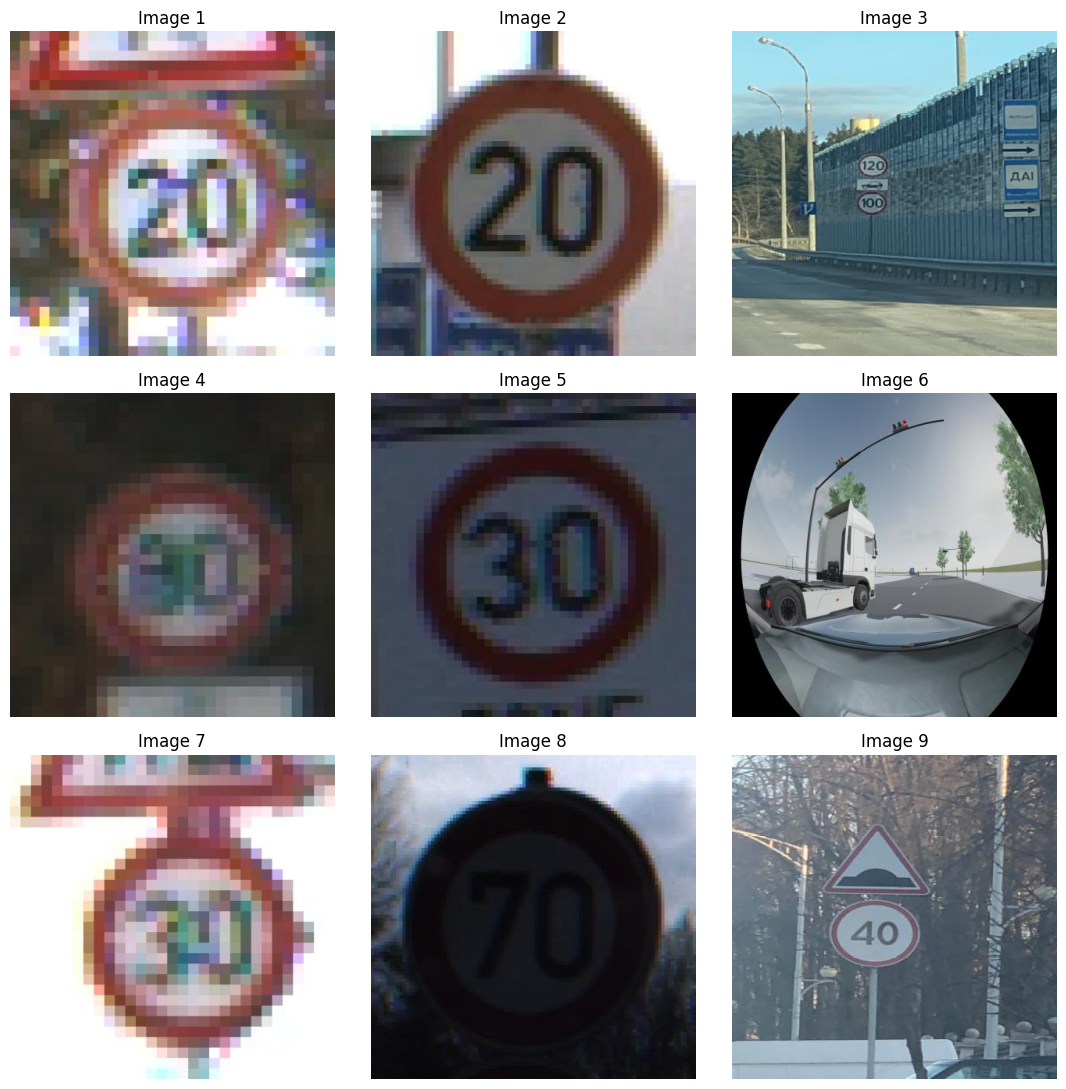

In [9]:
Image_dir = 'car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
import torch
print(torch.cuda.is_available())


False


# Training YOLO on Train Images

In [13]:
model = YOLO('yolov8n.pt')

model.train(data='/kaggle/input/traffic-signs-detection/car/data.yaml', epochs=100, batch=16, patience=4, save=True, verbose=True)

results = model.val()

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/traffic-signs-detection/car/data.yaml, epochs=100, time=None, patience=4, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-signs-detection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:08<00:00, 424.88it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-signs-detection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-signs-detection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 419.25it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-signs-detection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.36G     0.8533      3.437      1.186         25        640: 100%|██████████| 221/221 [00:44<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.37it/s]


                   all        801        944      0.235      0.394      0.255      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.34G     0.7497      2.494      1.095         27        640: 100%|██████████| 221/221 [00:41<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.68it/s]

                   all        801        944      0.363      0.528      0.393      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.33G      0.753      2.071      1.087         21        640: 100%|██████████| 221/221 [00:41<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.67it/s]

                   all        801        944      0.448       0.56      0.527      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.33G     0.7366      1.773      1.071         31        640: 100%|██████████| 221/221 [00:41<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.74it/s]

                   all        801        944      0.625      0.633      0.673      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.33G     0.7019      1.525      1.055         17        640: 100%|██████████| 221/221 [00:41<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.78it/s]

                   all        801        944      0.822      0.602      0.713      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.32G     0.6976      1.366      1.051         32        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.48it/s]

                   all        801        944      0.834      0.739      0.827      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.33G     0.6798      1.251      1.038         20        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.75it/s]

                   all        801        944      0.817      0.699      0.815      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.34G     0.6718      1.143       1.04         15        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.63it/s]

                   all        801        944      0.876      0.762      0.859      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.33G     0.6565      1.075      1.028         16        640: 100%|██████████| 221/221 [00:40<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.77it/s]

                   all        801        944      0.902      0.799      0.877      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.32G     0.6552      1.048      1.012         30        640: 100%|██████████| 221/221 [00:40<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]

                   all        801        944      0.924      0.786      0.891      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.33G     0.6564     0.9904      1.016         23        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.89it/s]

                   all        801        944      0.917      0.809      0.894      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.33G     0.6382     0.9384      1.014         22        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]

                   all        801        944      0.931      0.804      0.895      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.33G     0.6395     0.9188       1.01         31        640: 100%|██████████| 221/221 [00:40<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.56it/s]

                   all        801        944      0.913       0.79      0.887      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.32G     0.6229     0.8855      1.008         18        640: 100%|██████████| 221/221 [00:40<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.94it/s]

                   all        801        944      0.944      0.803      0.903      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.33G     0.6159     0.8462      1.002         26        640: 100%|██████████| 221/221 [00:40<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]


                   all        801        944      0.949      0.822      0.911      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.33G     0.6174     0.8586      0.999         26        640: 100%|██████████| 221/221 [00:41<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.94it/s]

                   all        801        944      0.931      0.829      0.909      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.33G     0.6159     0.8246     0.9975         21        640: 100%|██████████| 221/221 [00:41<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.00it/s]


                   all        801        944      0.943      0.838      0.923      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.32G      0.609     0.8168     0.9942         23        640: 100%|██████████| 221/221 [00:41<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.81it/s]

                   all        801        944      0.897      0.796      0.863      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.33G     0.6083     0.7865     0.9926         15        640: 100%|██████████| 221/221 [00:40<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.83it/s]

                   all        801        944      0.913      0.814      0.917      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.33G     0.6076     0.7782     0.9929         18        640: 100%|██████████| 221/221 [00:40<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.48it/s]

                   all        801        944      0.904       0.85       0.92      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.34G     0.5984     0.7659     0.9906         15        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.86it/s]

                   all        801        944       0.93      0.831      0.928      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.32G     0.5977     0.7585      0.987         22        640: 100%|██████████| 221/221 [00:40<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]


                   all        801        944      0.949      0.851      0.928      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.33G     0.5932     0.7403     0.9881         31        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.86it/s]

                   all        801        944      0.949      0.822      0.928      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.33G     0.5842     0.7324      0.987         21        640: 100%|██████████| 221/221 [00:40<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.93it/s]


                   all        801        944      0.952       0.87      0.944      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.33G     0.5972     0.7357     0.9893         17        640: 100%|██████████| 221/221 [00:41<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.82it/s]

                   all        801        944       0.94      0.843      0.937      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.33G     0.5797     0.7097     0.9842         21        640: 100%|██████████| 221/221 [00:40<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.84it/s]

                   all        801        944      0.935      0.862      0.939      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.33G     0.5804     0.6987     0.9821         20        640: 100%|██████████| 221/221 [00:40<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.82it/s]


                   all        801        944       0.94      0.888      0.948      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.33G     0.5838     0.7125     0.9808         24        640: 100%|██████████| 221/221 [00:40<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.80it/s]

                   all        801        944      0.934      0.875      0.941      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.33G     0.5775     0.6924     0.9789         22        640: 100%|██████████| 221/221 [00:40<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.84it/s]

                   all        801        944      0.937      0.861      0.944      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.32G     0.5843     0.6931     0.9769         14        640: 100%|██████████| 221/221 [00:40<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.89it/s]

                   all        801        944      0.921      0.881      0.947      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.33G     0.5796     0.6696     0.9789         19        640: 100%|██████████| 221/221 [00:40<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.94it/s]

                   all        801        944      0.938       0.87      0.939      0.805
EarlyStopping: Training stopped early as no improvement observed in last 4 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=4) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



31 epochs completed in 0.400 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.39it/s]


                   all        801        944      0.941      0.888      0.948      0.806
           Green Light         87        122      0.746      0.747      0.782      0.442
             Red Light         74        108      0.792      0.778       0.83      0.484
       Speed Limit 100         52         52      0.957      0.942      0.989      0.876
       Speed Limit 110         17         17          1      0.935      0.995      0.906
       Speed Limit 120         60         60          1      0.913      0.985      0.893
        Speed Limit 20         56         56      0.987      0.982      0.986      0.861
        Speed Limit 30         71         74       0.94      0.959      0.985      0.896
        Speed Limit 40         53         55       0.95      0.927      0.975      0.842
        Speed Limit 50         68         71      0.956      0.817      0.939       0.84
        Speed Limit 60         76         76      0.915      0.921      0.955      0.867
        Speed Limit 7

val: Scanning /kaggle/input/traffic-signs-detection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 951.90it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-signs-detection/car/valid is not writeable, cache not saved.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:06<00:00,  8.18it/s]


                   all        801        944      0.941      0.889      0.948      0.807
           Green Light         87        122      0.747      0.749       0.78      0.441
             Red Light         74        108      0.793      0.779      0.828      0.488
       Speed Limit 100         52         52      0.956      0.942      0.989      0.885
       Speed Limit 110         17         17          1      0.935      0.995      0.894
       Speed Limit 120         60         60          1      0.913      0.985      0.894
        Speed Limit 20         56         56      0.987      0.982      0.986      0.859
        Speed Limit 30         71         74       0.94      0.959      0.985      0.893
        Speed Limit 40         53         55      0.949      0.927      0.975      0.846
        Speed Limit 50         68         71      0.956      0.817      0.939      0.844
        Speed Limit 60         76         76      0.915      0.921      0.955      0.867
        Speed Limit 7

# Training Summary



In [7]:
results = model.val()

Ultralytics 8.3.54 🚀 Python-3.10.0 torch-2.5.1 CPU (Apple M1)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


FileNotFoundError: '/kaggle/input/traffic-signs-detection/car/data.yaml' does not exist

In [6]:
model = YOLO('runs2/detect/train2/weights/best.pt')

# Inferencing on the Validate Images

In [ ]:
inferences = model.predict('/content/car/car/valid/images')  # Make predictions

In [ ]:
print(results)

# Visualising Results Dataframe

In [2]:
import pandas as pd

resultscsv = pd.read_csv('runs2/detect/train2/results.csv')

resultscsv

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,53.6816,0.85328,3.43733,1.18601,0.23497,0.39378,0.25489,0.19721,0.80536,2.31989,1.19212,0.000175,0.000175,0.000175
1,2,100.9400,0.74967,2.49390,1.09490,0.36270,0.52769,0.39260,0.31575,0.76472,1.81237,1.11912,0.000346,0.000346,0.000346
2,3,147.7990,0.75299,2.07143,1.08720,0.44847,0.55986,0.52650,0.42306,0.77444,1.57930,1.11666,0.000515,0.000515,0.000515
3,4,194.3090,0.73660,1.77281,1.07092,0.62525,0.63274,0.67287,0.55731,0.74561,1.31730,1.10107,0.000510,0.000510,0.000510
4,5,240.6760,0.70189,1.52479,1.05513,0.82187,0.60173,0.71312,0.59708,0.72829,1.07102,1.05841,0.000505,0.000505,0.000505
5,6,286.9360,0.69761,1.36629,1.05146,0.83401,0.73942,0.82741,0.69509,0.70409,0.84941,1.04557,0.000500,0.000500,0.000500
6,7,332.9410,0.67978,1.25113,1.03795,0.81727,0.69916,0.81539,0.68847,0.67332,0.89858,1.02659,0.000495,0.000495,0.000495
7,8,379.0930,0.67179,1.14297,1.03970,0.87620,0.76192,0.85926,0.72582,0.67553,0.73790,1.03297,0.000490,0.000490,0.000490
8,9,425.2780,0.65653,1.07526,1.02782,0.90219,0.79851,0.87652,0.74231,0.66058,0.68045,1.00181,0.000484,0.000484,0.000484
9,10,471.1770,0.65519,1.04771,1.01153,0.92367,0.78594,0.89088,0.74867,0.66873,0.63193,1.01330,0.000479,0.000479,0.000479


# Visualising All Train Scores

In [8]:
f1_curve = 'runs2/detect/train2/F1_curve.png'
PR_curve = 'runs2/detect/train2/PR_curve.png'
P_curve = 'runs2/detect/train2/P_curve.png'
R_curve = 'runs2/detect/train2/R_curve.png'
confusion_matrix = 'runs2/detect/train2/confusion_matrix.png'

# # plt.figure(figsize=(12, 10))
# # plt.imshow(f1_curve)
# # plt.axis('off')
# # plt.title("F1 curve visualisation", fontsize=16, color='blue')
# # plt.show()

# f1_curve

# visualising f1 scores
f1_img = Image.open(f1_curve)
plt.figure(figsize=(12, 10))
plt.imshow(f1_img)
plt.axis('off')
plt.title("Training Results Visualization", fontsize=16, color='blue')
plt.show()

# visualising PR curve
PR_img = Image.open(PR_curve)
plt.figure(figsize=(12, 10))
plt.imshow(PR_img)
plt.axis('off')
plt.title("Training Results Visualization", fontsize=16, color='blue')
plt.show()

# visualising PR curve
P_img = Image.open(P_curve)
plt.figure(figsize=(12, 10))
plt.imshow(PR_img)
plt.axis('off')
plt.title("Training Results Visualization", fontsize=16, color='blue')
plt.show()

# visualising PR curve
R_img = Image.open(R_curve)
plt.figure(figsize=(12, 10))
plt.imshow(R_img)
plt.axis('off')
plt.title("Training Results Visualization", fontsize=16, color='blue')
plt.show()

# visualising PR curve
Matrix_img = Image.open(confusion_matrix)
plt.figure(figsize=(12, 10))
plt.imshow(Matrix_img)
plt.axis('off')
plt.title("Training Results Visualization", fontsize=16, color='blue')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/runs2/detect/train2/F1_curve.png'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Testing YOLOv8n model

In [7]:
import supervision as sv
import torch

YOLOmodel = YOLO("runs2/detect/train2/weights/best.pt")

YOLOmodel.eval()

#results2 = model.val(data='car/data.yaml')
#detections = sv.Detections.from_ultralytics(results2)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

# Inferencing with new images


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-1.jpeg: 384x640 1 Speed Limit 40, 99.0ms
Speed: 24.0ms preprocess, 99.0ms inference, 16.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[195, 126,  77],
         [195, 126,  77],
         [195, 126,  77],
         ...,
         [124,  99,  83],
         [118,  93,  77],
         [165, 142, 126]],
 
        [[195, 126,  77],
         [195, 126,  77],
         [195, 126,  77],
         ...,
         [139, 114,  98],
         [110,  85,  69],
         [203, 178, 162]],
 
        [[195, 126,  77],
         [195, 126,  77],
         [195, 126,  77],
         ...,
         [125,  98,  84],
         [100,  74,  60],
         [221, 196, 180]],
 
      

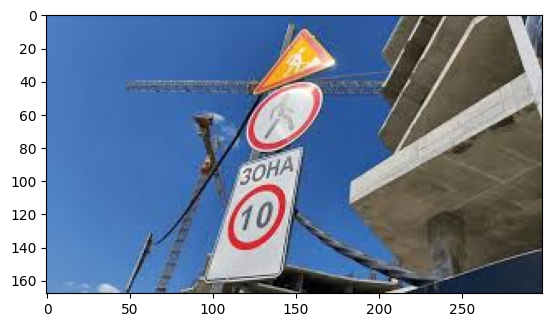

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image1 = 'inferences/images-1.jpeg'
img1 = mpimg.imread(image1)
prediction1 = YOLOmodel.predict(source= 'inferences/images-1.jpeg', save=True)


plt.imshow(img1)
plt.show
prediction1

In [ ]:
model.predict(source= '/content/Inferences/image2.jpeg')


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-2.jpeg: 448x640 1 Speed Limit 110, 81.7ms
Speed: 4.3ms preprocess, 81.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[170, 162, 173],
         [166, 158, 169],
         [162, 154, 165],
         ...,
         [221, 216, 213],
         [221, 216, 213],
         [221, 216, 213]],
 
        [[160, 152, 163],
         [168, 160, 170],
         [169, 161, 171],
         ...,
         [220, 215, 212],
         [220, 215, 212],
         [220, 215, 212]],
 
        [[165, 160, 169],
         [167, 163, 169],
         [163, 159, 165],
         ...,
         [218, 213, 210],
         [218, 213, 210],
         [218, 213, 210]],
 
      

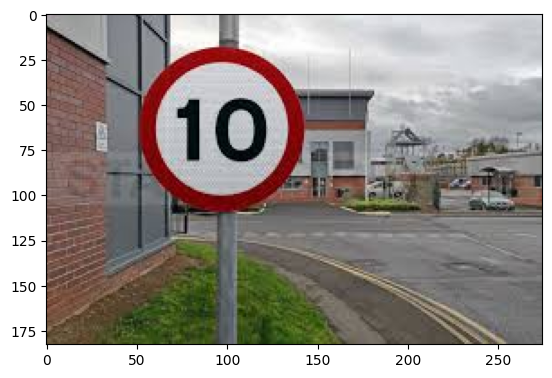

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image2 = 'inferences/images-2.jpeg'
img2 = mpimg.imread(image2)
prediction2 = YOLOmodel.predict(source= 'inferences/images-2.jpeg', save=True)


plt.imshow(img2)
plt.show
prediction2


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-3.jpeg: 448x640 1 Speed Limit 20, 69.7ms
Speed: 3.2ms preprocess, 69.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[243, 236, 233],
         [243, 236, 233],
         [243, 236, 233],
         ...,
         [249, 247, 246],
         [249, 247, 246],
         [249, 247, 246]],
 
        [[243, 236, 233],
         [243, 236, 233],
         [243, 236, 233],
         ...,
         [249, 247, 246],
         [249, 247, 246],
         [249, 247, 246]],
 
        [[243, 236, 233],
         [243, 236, 233],
         [243, 236, 233],
         ...,
         [249, 247, 246],
         [249, 247, 246],
         [249, 247, 246]],
 
      

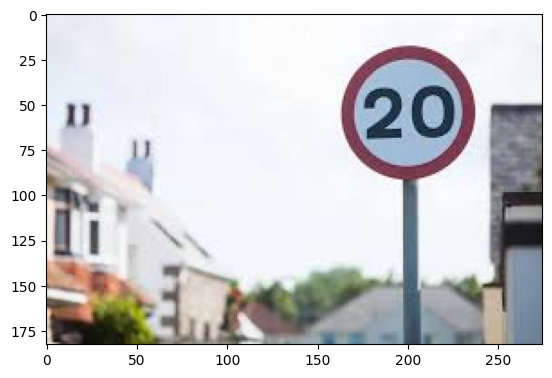

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image3 = 'inferences/images-3.jpeg'
img3 = mpimg.imread(image3)
prediction3 = YOLOmodel.predict(source= 'inferences/images-3.jpeg', save=True)


plt.imshow(img3)
plt.show
prediction3


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-4.jpeg: 416x640 1 Speed Limit 70, 64.0ms
Speed: 2.0ms preprocess, 64.0ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[247, 206, 183],
         [247, 206, 183],
         [246, 205, 182],
         ...,
         [250, 223, 197],
         [249, 222, 201],
         [249, 222, 201]],
 
        [[248, 207, 184],
         [248, 207, 184],
         [248, 207, 184],
         ...,
         [254, 226, 202],
         [249, 222, 201],
         [249, 222, 201]],
 
        [[249, 208, 185],
         [249, 208, 185],
         [250, 209, 186],
         ...,
         [255, 229, 205],
         [250, 223, 202],
         [250, 223, 203]],
 
      

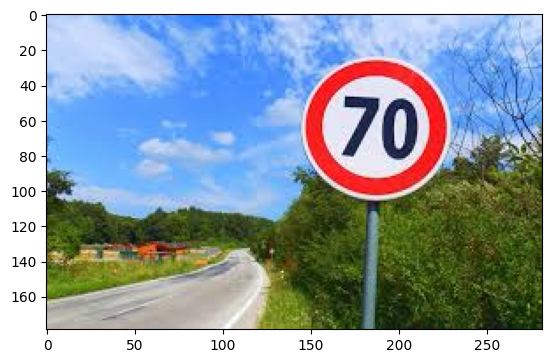

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image4 = 'inferences/images-4.jpeg'
img4 = mpimg.imread(image4)
prediction4 = YOLOmodel.predict(source= 'inferences/images-4.jpeg', save=True)


plt.imshow(img4)
plt.show
prediction4


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-5.jpeg: 640x448 1 Speed Limit 30, 66.2ms
Speed: 3.5ms preprocess, 66.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[177, 106,   2],
         [177, 106,   2],
         [177, 106,   2],
         ...,
         [216, 163, 126],
         [213, 160, 123],
         [209, 156, 119]],
 
        [[179, 107,   0],
         [179, 107,   0],
         [179, 107,   0],
         ...,
         [214, 161, 124],
         [211, 158, 121],
         [208, 155, 118]],
 
        [[179, 107,   0],
         [179, 107,   0],
         [179, 107,   0],
         ...,
         [212, 160, 124],
         [211, 159, 123],
         [208, 156, 120]],
 
      

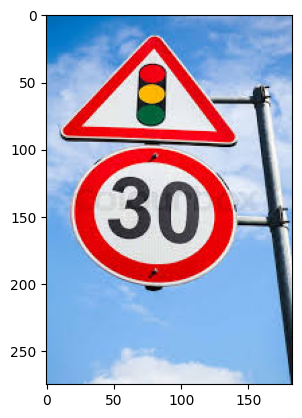

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image5 = 'inferences/images-5.jpeg'
img5 = mpimg.imread(image5)
prediction5 = YOLOmodel.predict(source= 'inferences/images-5.jpeg', save=True)

plt.imshow(img5)
plt.show
prediction5

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image6 = 'inferences/images-6.jpeg'
img6 = mpimg.imread(image6)
prediction6 = YOLOmodel.predict(source= 'inferences/images-6.jpeg', save=True, save_dir='inference_results')

print(results.save_dir)

plt.imshow(img6)
plt.show
prediction6


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-6.jpeg: 640x640 1 Speed Limit 30, 98.0ms
Speed: 5.3ms preprocess, 98.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


NameError: name 'results' is not defined


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-7.png: 640x640 1 Stop, 109.5ms
Speed: 5.4ms preprocess, 109.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
      

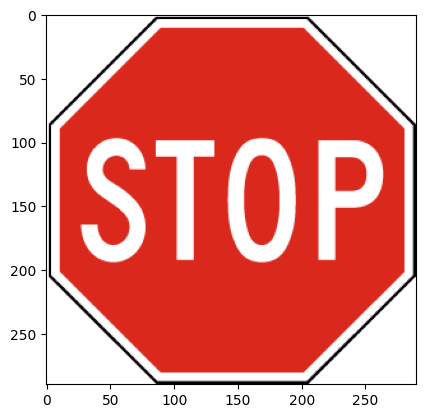

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image7 = 'inferences/images-7.png'
img7 = mpimg.imread(image7)
prediction7 = YOLOmodel.predict(source= 'inferences/images-7.png', save=True)


plt.imshow(img7)
plt.show
prediction7


image 1/1 /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/inferences/images-8.jpeg: 640x608 1 Speed Limit 110, 106.6ms
Speed: 2.1ms preprocess, 106.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
      

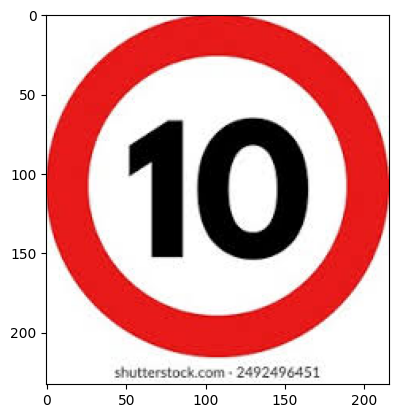

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image8 = 'inferences/images-8.jpeg'
img8 = mpimg.imread(image8)
prediction8 = YOLOmodel.predict(source= 'inferences/images-8.jpeg', save=True)


plt.imshow(img8)
plt.show
prediction8

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image9 = 'inferences/images-9.png'
img9 = mpimg.imread(image7)
prediction9 = YOLOmodel.predict(source= 'inferences/images-9.png', save=True)

for r in results:
    print(r.boxes)

plt.imshow(img9)
plt.show
prediction9

NameError: name 'image7' is not defined

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#video1 = 'video.mp4'
#vd1 = mpimg.imread(video1)
prediction10 = YOLOmodel.predict(source= 'video.mp4', save=True)


#plt.imshow(img9)
#plt.show
prediction9



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/video.mp4: 640x640 1 Speed Limit 50, 1 Stop, 122.3ms
video 1/1 (frame 2/508) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/video.mp4: 640x640 1 Stop, 82.6ms
video 1/1 (frame 3/508) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/video.mp4: 640x640 1 Stop, 77.3ms
video 1/1 (frame 4/508) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],
 
        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],
 
        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],
 
      

In [41]:
prediction11 = YOLOmodel.predict(source= 'video2.mp4', save=True)


#plt.imshow(img9)
#plt.show
prediction11



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/56) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/video2.mp4: 384x640 (no detections), 159.8ms
video 1/1 (frame 2/56) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/video2.mp4: 384x640 (no detections), 70.6ms
video 1/1 (frame 3/56) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image detection/video2.mp4: 384x640 (no detections), 54.5ms
video 1/1 (frame 4/56) /Users/ibrahimalghafri/Jupyter/Rihal/Week 7 Image d

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[207, 200, 194],
         [207, 200, 194],
         [207, 200, 194],
         ...,
         [145, 125, 122],
         [145, 125, 122],
         [145, 125, 122]],
 
        [[207, 200, 194],
         [207, 200, 194],
         [207, 200, 194],
         ...,
         [145, 125, 122],
         [145, 125, 122],
         [145, 125, 122]],
 
        [[207, 200, 194],
         [207, 200, 194],
         [207, 200, 194],
         ...,
         [145, 125, 122],
         [145, 125, 122],
         [145, 125, 122]],
 
      

In [48]:
import easyocr

reader = easyocr.Reader(['en','hi'])
result = reader.readtext('inferences/images-9.png')
for (bbox, text, prob) in result:
    print(f'\nText: {text}, Probability: {prob}')


Text: 10, Probability: 0.9644419690128881


In [1]:
import pandas as pd

resultscsv = pd.read_csv('runs2/detect/train2/results.csv')

resultscsv

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,53.6816,0.85328,3.43733,1.18601,0.23497,0.39378,0.25489,0.19721,0.80536,2.31989,1.19212,0.000175,0.000175,0.000175
1,2,100.9400,0.74967,2.49390,1.09490,0.36270,0.52769,0.39260,0.31575,0.76472,1.81237,1.11912,0.000346,0.000346,0.000346
2,3,147.7990,0.75299,2.07143,1.08720,0.44847,0.55986,0.52650,0.42306,0.77444,1.57930,1.11666,0.000515,0.000515,0.000515
3,4,194.3090,0.73660,1.77281,1.07092,0.62525,0.63274,0.67287,0.55731,0.74561,1.31730,1.10107,0.000510,0.000510,0.000510
4,5,240.6760,0.70189,1.52479,1.05513,0.82187,0.60173,0.71312,0.59708,0.72829,1.07102,1.05841,0.000505,0.000505,0.000505
5,6,286.9360,0.69761,1.36629,1.05146,0.83401,0.73942,0.82741,0.69509,0.70409,0.84941,1.04557,0.000500,0.000500,0.000500
6,7,332.9410,0.67978,1.25113,1.03795,0.81727,0.69916,0.81539,0.68847,0.67332,0.89858,1.02659,0.000495,0.000495,0.000495
7,8,379.0930,0.67179,1.14297,1.03970,0.87620,0.76192,0.85926,0.72582,0.67553,0.73790,1.03297,0.000490,0.000490,0.000490
8,9,425.2780,0.65653,1.07526,1.02782,0.90219,0.79851,0.87652,0.74231,0.66058,0.68045,1.00181,0.000484,0.000484,0.000484
9,10,471.1770,0.65519,1.04771,1.01153,0.92367,0.78594,0.89088,0.74867,0.66873,0.63193,1.01330,0.000479,0.000479,0.000479
